In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect= True)
# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
lastyear= dt.date(2017,8,23)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last12months=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > lastyear).\
order_by(Measurement.date).all()

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# set index to "Date" column, sort values by "Date"
last_year_prcp= pd.DataFrame(last12months)
last_year_prcp.columns=["Date", "PRCP"]
last_year_prcp.set_index("Date")
last_year_prcp.sort_values(by=["Date"])

,Date,PRCP
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


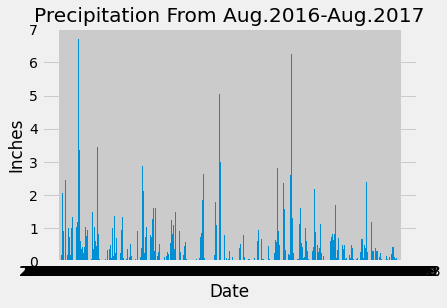

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis= last_year_prcp["Date"]
y_axis= last_year_prcp["PRCP"]

plt.bar(x_axis, y_axis)
#plt.xticks(np.arange(0, len(x_axis), 5))

plt.title("Precipitation From Aug.2016-Aug.2017")
plt.xlabel("Date")
plt.ylabel("Inches")
#ax.set_xticks([10])
plt.show()


#ypos= last_year_prcp["PRCP"]
#xpos= last_year_prcp["Date"]
#fig,ax = plt.subplots()
#last_year_prcp.plot(ax = ax)
#ax.set_xticks(xpos)
#ax.set_yticks(ypos)
#ax.set_xticklabels([2])
#ax.set_title("Precipitation From Aug.2016-Aug.2017")

#ax.set_ylabel("Inches")
#ax.set_xlabel("Date")
#plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_prcp["PRCP"].describe()


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: PRCP, dtype: float64

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station.station).count()
total_stations

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts= session.query(Measurement.station, func.count()).\
    group_by(Measurement.station).all()

station_counts_df= pd.DataFrame(station_counts)
station_counts_df.columns=["Station No.", "Times Recorded"]
station_counts_df.sort_values(by= "Times Recorded", ascending=False)


,Station No.,Times Recorded
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active= 'USC00519281'
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_last_year=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > lastyear).\
    order_by(Measurement.date).filter(Measurement.station == most_active).all()
most_active_last_year

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

Text(0, 0.5, 'Frequency')

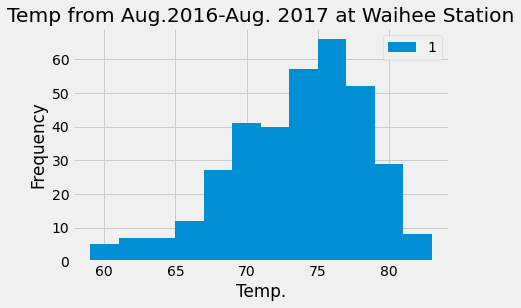

In [41]:
#histogram
most_active_last_year_df= pd.DataFrame(most_active_last_year)
most_active_last_year_df.plot.hist(bins=12)
plt.title("Temp from Aug.2016-Aug. 2017 at Waihee Station")
plt.xlabel("Temp.")
plt.ylabel("Frequency")

# Close session

In [ ]:
# Close Session
session.close()